In [1]:
from pylab import *
from scipy.integrate import *
from scipy.optimize import *

In [20]:
def pendulo_doble(t,th_vth,ml2=1,omega2=1):
    th1, th2 , vth1 , vth2 = th_vth
    dth1 = (6/ml2)*((2*vth1-3*vth2*cos(th1-th2))/(16-9*cos(th1-th2)**2))
    dth2 = (6/ml2)*((8*vth2-3*vth1*cos(th1-th2))/(16-9*cos(th1-th2)**2))
    dpth1 = -0.5*ml2*(vth1*vth2*sin(th1-th2) + 3*omega2*sin(th1))
    dpth2 = -0.5*ml2*(-vth1*vth2*sin(th1-th2) + omega2*sin(th2))
    return array([ dth1 , dth2 , dpth1 , dpth2 ])

def th2xy(ths,L=1):
    th1 , th2 = ths[0] , ths[1]
    x1 = 0.5*L*sin(th1)
    y1 = -0.5*L*cos(th1)
    x2 = L*(sin(th1) + 0.5*sin(th2))
    y2 = -L*(cos(th1) + 0.5*cos(th2))
    return array([x1,y1,x2,y2])

In [17]:
t = linspace(0,50*pi,1000)
ci = [0.05,0.05,0,0]
th_pth = solve_ivp(pendulo_doble,(t[0],t[-1]),ci,atol=1e-8,rtol=1e-8,dense_output=True)

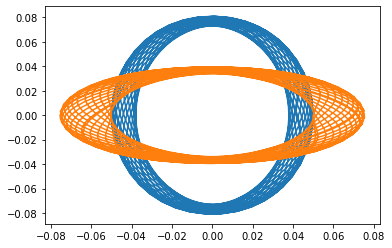

In [18]:
plot(th_pth.sol(t)[0],th_pth.sol(t)[2])
plot(th_pth.sol(t)[1],th_pth.sol(t)[3])
show()

In [21]:
esp_xy = th2xy(th_pth.sol(t)[0:2])

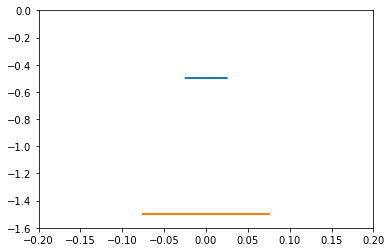

In [26]:
plot(esp_xy[0],esp_xy[1])
plot(esp_xy[2],esp_xy[3])
ylim([-1.6,0]),xlim([-0.2,0.2])
show()

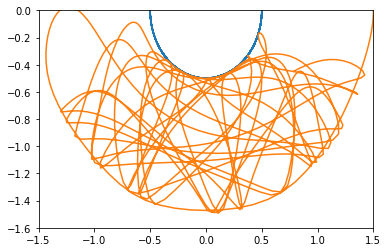

In [29]:
t = linspace(0,25*pi,1000)
ci = [0.5*pi,0.5*pi,0,0]
th_pth = solve_ivp(pendulo_doble,(t[0],t[-1]),ci,atol=1e-8,rtol=1e-8,dense_output=True)
esp_xy = th2xy(th_pth.sol(t)[0:2])
plot(esp_xy[0],esp_xy[1])
plot(esp_xy[2],esp_xy[3])
ylim([-1.6,0]),xlim([-1.5,1.5])
show()

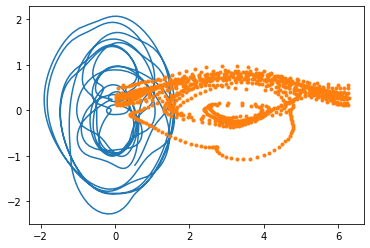

In [40]:
plot(th_pth.sol(t)[0],th_pth.sol(t)[2])
plot((th_pth.sol(t)[1]-pi)%(2*pi),th_pth.sol(t)[3],'.')
show()

In [37]:
3%2

1